<h1 style="text-align: center;">
<b>Gastos Hospitalares</b>
</h1>

<h3 style="text-align: justify;">
Script para criação de mapas com dados de gastos hospitalares no Brasil.
</h3>

<p style='text-align: justify;'>
Os dados presentes nas análises foram extraídos do Tabnet. O Tabnet é uma 
ferramenta desenvolvida pelo Departamento de Informação e Informática do Sistema 
Único de Saúde (DataSUS) da Secretaria de Informação e Saúde Digital do Ministério
da Saúde (MS). Esta ferramenta abrange dados epidemiológicos, de mortalidade, 
da rede assistencial, de internações hospitalares, de procedimentos realizados 
na atenção primária, entre outras.
Para este trabalho, foram usadas as informações do Sistema de Informações 
Hospitalares (SIH), referentes às internações hospitalares aprovadas no período 
de 2014 a 2022. Foram usados os dados de Autorização de Internação Hospitalar 
(AIH) no formato reduzido (RD) com abrangência geográfica no nível municipal. 
Foi selecionado para o campo linha os municípios brasileiros. Para as colunas, 
foi selecionado o ano/mês de processamento.
</p>

<h4 style="text-align: justify;">
<b>Gastos Hospitalares</b>
<h4>

<p style="text-align: justify;">
O valor do gasto hospitalar representa o valor total dos procedimentos presentes na AIH realizados naquela internação. Esse valores são regulamentados pela Tabela Unificada de Procedimentos, Medicamentos e Órteses, Próteses e Materiais Especiais do SUS (SIGTAP).
</p>

<h4 style="text-align: justify;">
<b>Mortalidade</b>
<h4>

<p style="text-align: justify;">
A taxa de mortalidade é calculada pela razão entre o número de óbitos e número de internações, dada também pelo TabNet.
</p>

<h4 style="text-align: justify;">
<b>População</b>
<h4>
<p style='text-align: justify;'>
Os dados de população dos municípios utilizados neste trabalho, foram obtidas a partirde duas fontes. Para os anos de 2014 a 2021, foram utilizadas as estimativas preliminares
elaboradas pelo Ministério da Saúde, disponibilizados pelo TabNet.
</p>
<p style='text-align: justify;'>
O dado de população em 2022 foi obtido no site do Instituto Brasileiro de Geografia eEstatística - IBGE.
</p>

<p style="text-align: justify;">
<b>Acesse os dados no portal</b>

[Datasus Saúde Governo Federal](https://datasus.saude.gov.brinformacoes-de-saude-tabnet/)
</p>

<p style="text-align: justify;">

[Panorama Censo 2022 - IBGE](https://censo2022.ibge.gov.br/panorama/)
</p>

<p style="text-align: justify;">
___________________________________________


In [14]:
import geobr
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [15]:
df = pd.read_excel('base_tratada.xlsx', engine='openpyxl')

df.head()

,municipio,cod_ibge,cod_uf,uf,regiao,ano,gastos,mortalidade,populacao
0,ALTA FLORESTA D'OESTE,110001,11,RO,NORTE,2014,760888.27,0.35,24066
1,ARIQUEMES,110002,11,RO,NORTE,2014,3463928.54,2.57,99278
2,CABIXI,110003,11,RO,NORTE,2014,89403.87,NaN,5951
3,CACOAL,110004,11,RO,NORTE,2014,7392914.64,3.59,82595
4,CEREJEIRAS,110005,11,RO,NORTE,2014,491123.65,0.37,16936


In [16]:
# criando um novo df com ano de 2022 


df_2022 = df[df['ano'] == 2022].reset_index(drop=True)

df_2022['cod_ibge'] = df_2022['cod_ibge'].apply(lambda x: str(x))
df_2022.head()

,municipio,cod_ibge,cod_uf,uf,regiao,ano,gastos,mortalidade,populacao
0,ALTA FLORESTA D'OESTE,110001,11,RO,NORTE,2022,578054.15,1.05,21558
1,ARIQUEMES,110002,11,RO,NORTE,2022,6742577.73,3.23,100896
2,CABIXI,110003,11,RO,NORTE,2022,67574.87,2.21,5107
3,CACOAL,110004,11,RO,NORTE,2022,11189325.43,4.50,92202
4,CEREJEIRAS,110005,11,RO,NORTE,2022,435512.87,0.79,15237


In [17]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   municipio    5570 non-null   object 
 1   cod_ibge     5570 non-null   object 
 2   cod_uf       5570 non-null   int64  
 3   uf           5570 non-null   object 
 4   regiao       5570 non-null   object 
 5   ano          5570 non-null   int64  
 6   gastos       3120 non-null   float64
 7   mortalidade  2775 non-null   float64
 8   populacao    5570 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 391.8+ KB


In [18]:
# importando a malha municipal do geobr

muni = geobr.read_municipality(year=2020)
muni

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,1100015.0,Alta Floresta D'oeste,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-62.19465 -11.82746, -62.18945..."
1,1100023.0,Ariquemes,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-62.53648 -9.73222, -62.52765 ..."
2,1100031.0,Cabixi,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-60.37119 -13.36655, -60.37661..."
3,1100049.0,Cacoal,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-61.00080 -11.29737, -61.00103..."
4,1100056.0,Cerejeiras,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-61.49976 -13.00525, -61.49426..."
...,...,...,...,...,...,...,...,...
5565,5222005.0,Vianópolis,52.0,GO,Goiás,5.0,Centro Oeste,"MULTIPOLYGON (((-48.38114 -16.63141, -48.38044..."
5566,5222054.0,Vicentinópolis,52.0,GO,Goiás,5.0,Centro Oeste,"MULTIPOLYGON (((-49.84456 -17.58262, -49.84020..."
5567,5222203.0,Vila Boa,52.0,GO,Goiás,5.0,Centro Oeste,"MULTIPOLYGON (((-47.11416 -14.67412, -47.11313..."
5568,5222302.0,Vila Propício,52.0,GO,Goiás,5.0,Centro Oeste,"MULTIPOLYGON (((-48.75586 -14.86267, -48.74989..."


In [19]:
# ajeitando a variável de código municipal para ser compativel com a base de dados
# deixando código municípal com 6 dígitos

muni['cod_municipal'] = muni['code_muni'].apply(lambda x: str(int(x)))

muni['cod_municipal'] = muni['cod_municipal'].str[:-1]

muni.head()

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry,cod_municipal
0,1100015.0,Alta Floresta D'oeste,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-62.19465 -11.82746, -62.18945...",110001
1,1100023.0,Ariquemes,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-62.53648 -9.73222, -62.52765 ...",110002
2,1100031.0,Cabixi,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-60.37119 -13.36655, -60.37661...",110003
3,1100049.0,Cacoal,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-61.00080 -11.29737, -61.00103...",110004
4,1100056.0,Cerejeiras,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-61.49976 -13.00525, -61.49426...",110005


In [20]:
#juntando a malha com a base

muni = muni.merge(df_2022, how="left", left_on="cod_municipal", right_on="cod_ibge")
muni.head()

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry,cod_municipal,municipio,cod_ibge,cod_uf,uf,regiao,ano,gastos,mortalidade,populacao
0,1100015.0,Alta Floresta D'oeste,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-62.19465 -11.82746, -62.18945...",110001,ALTA FLORESTA D'OESTE,110001,11,RO,NORTE,2022,578054.15,1.05,21558
1,1100023.0,Ariquemes,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-62.53648 -9.73222, -62.52765 ...",110002,ARIQUEMES,110002,11,RO,NORTE,2022,6742577.73,3.23,100896
2,1100031.0,Cabixi,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-60.37119 -13.36655, -60.37661...",110003,CABIXI,110003,11,RO,NORTE,2022,67574.87,2.21,5107
3,1100049.0,Cacoal,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-61.00080 -11.29737, -61.00103...",110004,CACOAL,110004,11,RO,NORTE,2022,11189325.43,4.50,92202
4,1100056.0,Cerejeiras,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-61.49976 -13.00525, -61.49426...",110005,CEREJEIRAS,110005,11,RO,NORTE,2022,435512.87,0.79,15237


(-76.24758052684999, -26.59070825415, -35.68296806035001, 6.816413399350002)

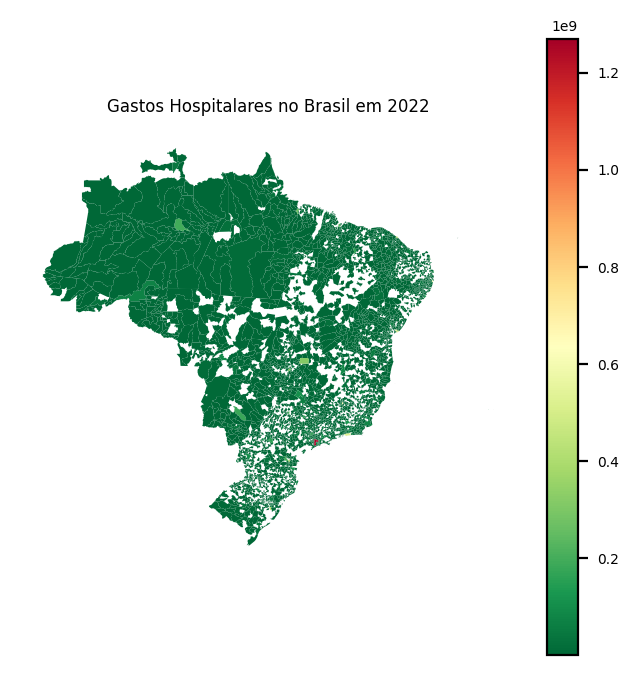

In [21]:
# plotando mapa dos gastos hospitalares em 2022


plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(4, 4), dpi=200)

muni.plot(
    column="gastos",
    cmap="RdYlGn_r",
    legend=True,
    ax=ax,
)

ax.set_title("Gastos Hospitalares no Brasil em 2022")
ax.axis("off")

(-76.04924408015, -26.600152846849998, -35.68296806035001, 6.816413399350002)

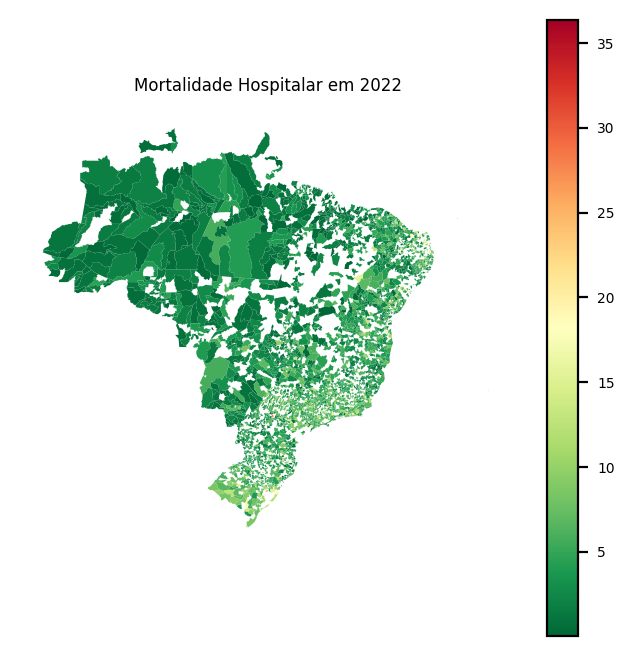

In [22]:
# plotando mapa da taxa de mortalidade em 2022


plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(4, 4), dpi=200)

muni.plot(
    column="mortalidade",
    cmap="RdYlGn_r",
    legend=True,
    ax=ax,
)

ax.set_title("Mortalidade Hospitalar em 2022")
ax.axis("off")

In [23]:
# agrupando dados por uf e ano

uf_22 = df_2022.groupby('uf').agg({'gastos': 'sum', 'mortalidade': 'mean', 
                                           'populacao': 'sum'}).reset_index()

uf_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uf           27 non-null     object 
 1   gastos       27 non-null     float64
 2   mortalidade  27 non-null     float64
 3   populacao    27 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 996.0+ bytes


In [24]:
states = geobr.read_state(year=2020)
states = states.merge(uf_22, how="left", left_on="abbrev_state", right_on="uf")
states

,code_state,abbrev_state,name_state,code_region,name_region,geometry,uf,gastos,mortalidade,populacao
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-65.38150 -10.42907, -65.38013...",RO,1.247649e+08,2.041714,1616379
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ...",AC,4.337799e+07,1.650000,829780
2,13.0,AM,Amazônas,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ...",AM,2.377071e+08,1.297321,3952262
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-63.96008 2.47313, -63.96041 2...",RR,4.356493e+07,1.001667,634805
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ...",PA,5.457203e+08,1.872571,8442962
5,16.0,AP,Amapá,1.0,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2...",AP,3.593172e+07,2.336000,774268
6,17.0,TO,Tocantins,1.0,Norte,"MULTIPOLYGON (((-48.23291 -5.94757, -48.23163 ...",TO,9.915602e+07,2.200870,1584306
7,21.0,MA,Maranhão,2.0,Nordeste,"MULTIPOLYGON (((-44.96620 -1.27114, -44.96081 ...",MA,4.525143e+08,1.380357,6800605
8,22.0,PI,Piauí,2.0,Nordeste,"MULTIPOLYGON (((-42.91509 -6.64795, -42.91636 ...",PI,2.468065e+08,2.895854,3270174
9,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-41.18292 -4.01797, -41.18552 ...",CE,7.264471e+08,4.321935,8936431


(-76.24759047175, -26.590499411249997, -35.70232894755, 7.22299203055)

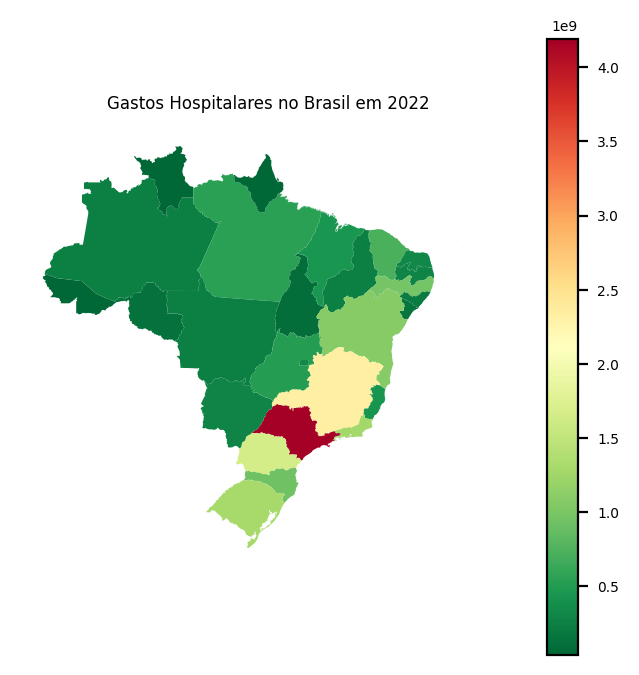

In [25]:

# plotando mapa dos gastos por uf


plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(4, 4), dpi=200)

states.plot(
    column="gastos",
    cmap="RdYlGn_r",
    legend=True,
    ax=ax,
)

ax.set_title("Gastos Hospitalares no Brasil em 2022")
ax.axis("off")

(-76.24759047175, -26.590499411249997, -35.70232894755, 7.22299203055)

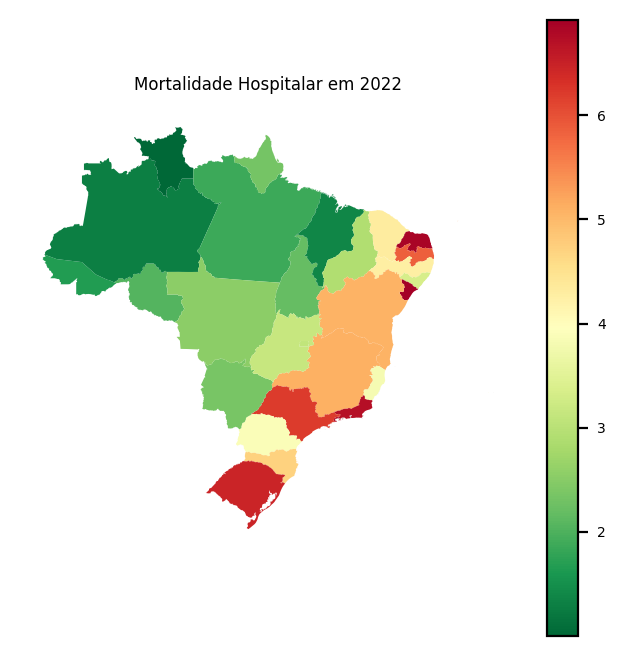

In [26]:

# plotando mapa da mortalidade


plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(4, 4), dpi=200)

states.plot(
    column="mortalidade",
    cmap="RdYlGn_r",
    legend=True,
    ax=ax,
)

ax.set_title("Mortalidade Hospitalar em 2022")
ax.axis("off")